This jupyter notebook does the cleaning, preprocessing and annotation of the OTU table obtained from the TotalRNA pipeline after aligning the mRNA to the Md5nr database using SWORD. 

This notebook relies in the previous CoMW script and it is coupled to a specific version of the database. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import roman

## Read SWORD file
Our input is a bm9 file, which is not exactly a csv file. The easiest way to read it as a CSV file is to create a temporary file. 

In [2]:
aligned_bm9 = '../results/mRNA/sword/SWORD_Md5nr_result.bm9'
!head ../results/mRNA/sword/SWORD_Md5nr_result.bm9

# Fields:
Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
TRINITY_DN13529_c0_g1_i4_6	7c1ab1d853518a10517b489f8cea9873	26	474	267	18	36	482	1682	2096	1.17e-04	142
TRINITY_DN13529_c0_g1_i4_6	53ff5f579bb15dc36215ec8a1fe18db5	25	439	234	24	33	422	16	408	2.81e-04	137
TRINITY_DN13529_c0_g1_i4_6	62f33e1faa2b0de0b3e0dce850c6970e	23	884	529	43	32	810	1966	2798	7.04e-04	135
TRINITY_DN13529_c0_g1_i4_6	8ddb55c3ca5c60e87e3e48544724ebfd	26	546	328	28	30	535	1831	2342	8.52e-04	134
TRINITY_DN13529_c0_g1_i4_6	4b581be0290e9a32013de22b4db7ac97	23	853	535	36	30	812	1836	2638	1.09e-03	133
TRINITY_DN13529_c0_g1_i4_6	156d51e8ca2e5977245e81299ffb1bc7	26	273	175	14	205	463	303	562	1.10e-03	133
TRINITY_DN13529_c0_g1_i4_6	905022a1f1daaffded77415a2fa6d9b9	24	433	259	19	39	438	4447	4841	1.16e-03	133
TRINITY_DN13529_c0_g1_i4_6	5f9bc57c99d075886d6bfee0cd60e31d	24	786	473	34	30	746	1847	2573	1.39e-03	132


In [3]:
%%bash
grep -v "Query id," < ../results/mRNA/sword/SWORD_Md5nr_result.bm9 >  temp_SWORD_Md5nr_result.csv

In [4]:
sword = pd.read_csv(
    'temp_SWORD_Md5nr_result.csv',delimiter='\t',comment='#', header=None,
    names= ['Query id', 'Subject id', '% identity', 'alignment length', 
             'mismatches','gap openings','q. start', 'q. end',
             's. start', 's. end', 'e-value', 'score'
            ]
)

In [5]:
%%bash
rm  temp_SWORD_Md5nr_result.csv

Now, we have a table with all the alignments between our "genes" and the database.

In [6]:
sword

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
0,TRINITY_DN13529_c0_g1_i4_6,7c1ab1d853518a10517b489f8cea9873,26,474,267,18,36,482,1682,2096,0.000117,142
1,TRINITY_DN13529_c0_g1_i4_6,53ff5f579bb15dc36215ec8a1fe18db5,25,439,234,24,33,422,16,408,0.000281,137
2,TRINITY_DN13529_c0_g1_i4_6,62f33e1faa2b0de0b3e0dce850c6970e,23,884,529,43,32,810,1966,2798,0.000704,135
3,TRINITY_DN13529_c0_g1_i4_6,8ddb55c3ca5c60e87e3e48544724ebfd,26,546,328,28,30,535,1831,2342,0.000852,134
4,TRINITY_DN13529_c0_g1_i4_6,4b581be0290e9a32013de22b4db7ac97,23,853,535,36,30,812,1836,2638,0.001090,133
...,...,...,...,...,...,...,...,...,...,...,...,...
1818190,TRINITY_DN47324_c0_g1_i1_1,dfaa73f28ea2ba7bbc62b8283393a47d,50,30,15,0,37,66,180,209,5.990000,72
1818191,TRINITY_DN59565_c0_g1_i1_2,e347c2cc3c796268c81f5e178188ffa9,42,55,21,6,18,67,23,71,2.590000,77
1818192,TRINITY_DN59544_c0_g1_i1_1,634c59d4cb4978c4987e8cdeae58459e,39,56,25,3,1,50,31,83,4.400000,70
1818193,TRINITY_DN59544_c0_g1_i1_1,872967c9ff4a22dcf553d8bd78c8a775,43,28,16,0,24,51,83,110,5.050000,73


## Read count table
However, we also need to read the count table:

In [7]:
counts_tsv = '../results/mRNA/mapped_reads_to_contigs_AbundanceFiltered.tsv'
! head ../results/mRNA/mapped_reads_to_contigs_AbundanceFiltered.tsv

ContigID	Katie45	Katie54	Katie32	Katie25
TRINITY_DN16047_c0_g1_i1	3	0	2	2
TRINITY_DN3406_c0_g1_i2	0	37	0	4
TRINITY_DN6613_c4_g1_i2	4	18	0	0
TRINITY_DN5543_c0_g1_i2	3	0	4	3
TRINITY_DN60437_c0_g1_i1	0	10	0	1
TRINITY_DN573_c0_g1_i1	0	51	2	2
TRINITY_DN61772_c0_g1_i1	0	8	0	0
TRINITY_DN15263_c0_g1_i1	0	7	0	2
TRINITY_DN2319_c0_g1_i9	48	0	8	27


In [8]:
counts = pd.read_csv(
    counts_tsv, sep = "\t", comment='#'
).set_index('ContigID')
counts

,Katie45,Katie54,Katie32,Katie25
ContigID,,,,
TRINITY_DN16047_c0_g1_i1,3,0,2,2
TRINITY_DN3406_c0_g1_i2,0,37,0,4
TRINITY_DN6613_c4_g1_i2,4,18,0,0
TRINITY_DN5543_c0_g1_i2,3,0,4,3
TRINITY_DN60437_c0_g1_i1,0,10,0,1
...,...,...,...,...
TRINITY_DN48454_c0_g1_i1,4,0,4,2
TRINITY_DN41188_c0_g1_i1,2,0,2,2
TRINITY_DN7932_c0_g2_i1,4,0,2,7


## Preprocessing
### Most significant hit per Contig

Before using Sword, we used transeq to obtain each possible ORF. Let's create a column with the gene name. That is, without the last 2 characters (_ 1, _ 2...) that encode the ORF.

In [9]:
sword['ContigID'] = sword['Query id'].str.replace('_[1-6]$', '', regex=True)
sword['ContigID']

0          TRINITY_DN13529_c0_g1_i4
1          TRINITY_DN13529_c0_g1_i4
2          TRINITY_DN13529_c0_g1_i4
3          TRINITY_DN13529_c0_g1_i4
4          TRINITY_DN13529_c0_g1_i4
                     ...           
1818190    TRINITY_DN47324_c0_g1_i1
1818191    TRINITY_DN59565_c0_g1_i1
1818192    TRINITY_DN59544_c0_g1_i1
1818193    TRINITY_DN59544_c0_g1_i1
1818194    TRINITY_DN19471_c0_g1_i1
Name: ContigID, Length: 1818195, dtype: object

Now, we need to get the most significant hit per each contig ID. Let's inspect how many hits there are per contig (adjust the number of bins). 

Text(0.5, 1.0, 'Number of hits per contig')

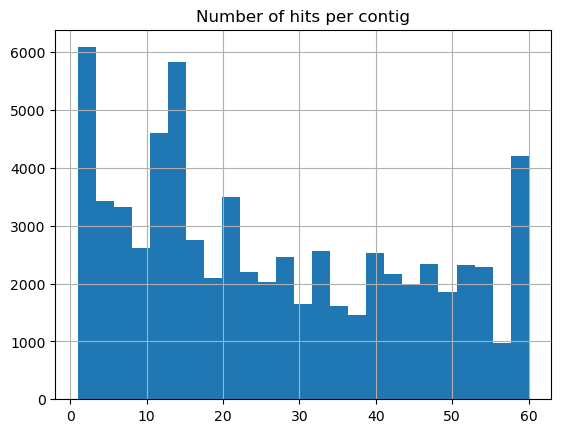

In [10]:
sword.pivot_table(columns=['ContigID'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig")

In this case, we are going to sort rows per e-value and score and get the most significant hit per each ContigId.

In [11]:
sword = sword.sort_values(
        by=['e-value', 'score'], ascending=[True, False]
        ).drop_duplicates(
    'ContigID', keep='first'
).set_index('ContigID')
sword

,Query id,Subject id,% identity,alignment length,mismatches,gap openings,q. start,q. end,s. start,s. end,e-value,score
ContigID,,,,,,,,,,,,
TRINITY_DN2033_c0_g1_i6,TRINITY_DN2033_c0_g1_i6_3,7bda95cbf930acbd98b2f9c78fe63f1b,83,1694,281,2,50,1740,1,1692,0.00,7384
TRINITY_DN2033_c0_g1_i1,TRINITY_DN2033_c0_g1_i1_3,7bda95cbf930acbd98b2f9c78fe63f1b,83,1694,282,2,50,1740,1,1692,0.00,7381
TRINITY_DN510_c0_g1_i12,TRINITY_DN510_c0_g1_i12_1,8b366692858507c0d6741d9781be63c0,84,1329,214,1,120,1447,4,1332,0.00,5843
TRINITY_DN510_c0_g1_i9,TRINITY_DN510_c0_g1_i9_1,8b366692858507c0d6741d9781be63c0,84,1329,214,1,118,1445,4,1332,0.00,5843
TRINITY_DN510_c0_g1_i5,TRINITY_DN510_c0_g1_i5_1,8b366692858507c0d6741d9781be63c0,84,1329,215,1,118,1445,4,1332,0.00,5842
...,...,...,...,...,...,...,...,...,...,...,...,...
TRINITY_DN1359_c0_g2_i1,TRINITY_DN1359_c0_g2_i1_4,89f76e61316988f61447b4e01f6a3d3c,37,52,32,1,18,69,10,60,9.98,71
TRINITY_DN55920_c0_g1_i1,TRINITY_DN55920_c0_g1_i1_4,088cb57d22b4986a5ef62b256215cd3b,46,39,14,3,16,48,133,170,9.98,70
TRINITY_DN1974_c1_g1_i1,TRINITY_DN1974_c1_g1_i1_5,eda5990033ea08c1abeb8a40ba74aa0a,37,51,30,2,24,73,364,413,10.00,78


### Inspect E-values from aligned orthologous genes before filtering by e-value

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

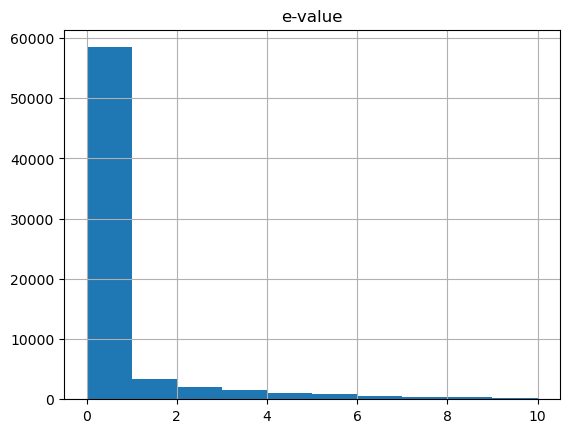

In [12]:
sword.hist("e-value")

### Inspect E-values from aligned orthologous genes after filtering by e-value

We need to set a threshold:

In [13]:
evalue_threshold = 0.001

In [14]:
sword = sword.loc[sword['e-value'] < evalue_threshold] 

array([[<Axes: title={'center': 'e-value'}>]], dtype=object)

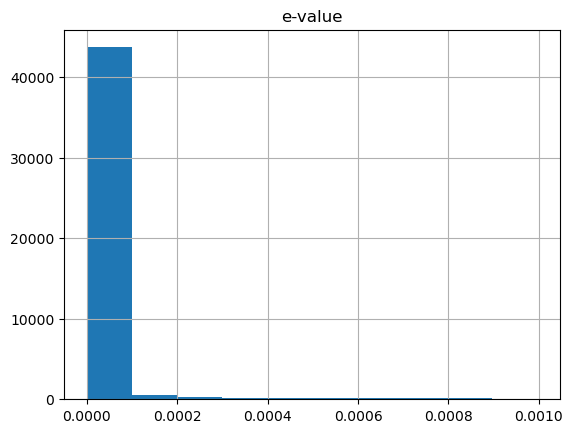

In [15]:
sword.hist("e-value")

In [16]:
val = len(set(sword["Subject id"]))
print(f"There are {val} unique orthologous genes")

There are 30806 unique orthologous genes


### Inspect % identity and aligment length

array([[<Axes: title={'center': 'alignment length'}>]], dtype=object)

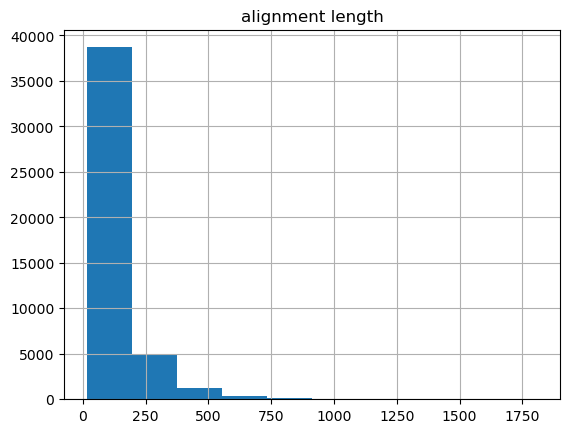

In [17]:
sword.hist("alignment length")

array([[<Axes: title={'center': '% identity'}>]], dtype=object)

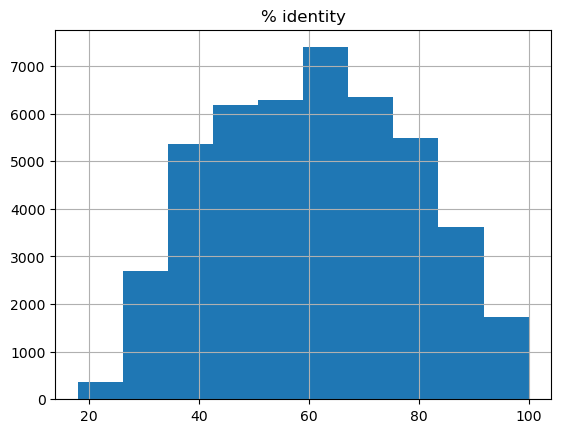

In [18]:
sword.hist("% identity")

### Merging aligned genes and count table
First, we are going to drop all columns except for ContigsID and orthologous genes header (to obtain map table). 

In [19]:
map_table = sword[["Query id","Subject id"]]
map_table

,Query id,Subject id
ContigID,,
TRINITY_DN2033_c0_g1_i6,TRINITY_DN2033_c0_g1_i6_3,7bda95cbf930acbd98b2f9c78fe63f1b
TRINITY_DN2033_c0_g1_i1,TRINITY_DN2033_c0_g1_i1_3,7bda95cbf930acbd98b2f9c78fe63f1b
TRINITY_DN510_c0_g1_i12,TRINITY_DN510_c0_g1_i12_1,8b366692858507c0d6741d9781be63c0
TRINITY_DN510_c0_g1_i9,TRINITY_DN510_c0_g1_i9_1,8b366692858507c0d6741d9781be63c0
TRINITY_DN510_c0_g1_i5,TRINITY_DN510_c0_g1_i5_1,8b366692858507c0d6741d9781be63c0
...,...,...
TRINITY_DN9552_c0_g2_i3,TRINITY_DN9552_c0_g2_i3_3,f3b3fb1b6e25015a5cbd53b2ad9bd701
TRINITY_DN39117_c0_g1_i1,TRINITY_DN39117_c0_g1_i1_2,6036dd37eaa2b4666afd0e489d20bb71
TRINITY_DN37358_c0_g1_i1,TRINITY_DN37358_c0_g1_i1_4,ba6939c362433d00a02990f7f06be460


Now, we are going to merge both files by their column in common (ContigID and Subject id).

In [20]:
df = pd.merge(map_table, counts, left_index=True, right_index=True).reset_index(drop=True)
df

,Query id,Subject id,Katie45,Katie54,Katie32,Katie25
0,TRINITY_DN2033_c0_g1_i6_3,7bda95cbf930acbd98b2f9c78fe63f1b,66,1,38,100
1,TRINITY_DN2033_c0_g1_i1_3,7bda95cbf930acbd98b2f9c78fe63f1b,65,1,43,110
2,TRINITY_DN510_c0_g1_i12_1,8b366692858507c0d6741d9781be63c0,181,0,63,124
3,TRINITY_DN510_c0_g1_i9_1,8b366692858507c0d6741d9781be63c0,169,1,71,142
4,TRINITY_DN510_c0_g1_i5_1,8b366692858507c0d6741d9781be63c0,160,1,86,118
...,...,...,...,...,...,...
36015,TRINITY_DN40000_c0_g1_i1_5,3e9d34f0114f50e001b9e0b243028956,0,0,6,6
36016,TRINITY_DN9552_c0_g2_i3_3,f3b3fb1b6e25015a5cbd53b2ad9bd701,1,0,11,6
36017,TRINITY_DN39117_c0_g1_i1_2,6036dd37eaa2b4666afd0e489d20bb71,0,9,0,0
36018,TRINITY_DN37358_c0_g1_i1_4,ba6939c362433d00a02990f7f06be460,7,0,0,2


### Aggregate table
Now, we are going to aggregate the rows by grouping by "Subject id" (notice the difference in rows between the previous table and the following):

In [21]:
df = df.groupby('Subject id').sum(numeric_only = True)
df

,Katie45,Katie54,Katie32,Katie25
Subject id,,,,
0002220eb74872387830ccf0ef001b51,2,0,4,6
000b463a4343e18ba6300bb833b9384d,0,4,2,2
000cec1553e2b36d85cb945a5b9cf315,2,0,17,61
0012ddd1c5d90f39fbe6c500621f13b7,1,38,6,10
0013b83a784bc8cecc930a4b4eb64b07,0,10,0,0
...,...,...,...,...
ffeaa12b2a457fc052cfe195bfe206d6,9,0,8,5
ffeddfdfdfa4d6e34f28e70a13db7f64,49,1603,46,58
fff3b33749cc9c83780d44e69dfaae2b,0,12,0,0


## Annotating count table

The original annotation involves several files, and it's intricate. We will use the original script since the effort of rewriting it for an out-of-date database doesn't seem worthy. 

In [22]:
df.reset_index(inplace=True)
df.rename(columns={"Subject id": "ContigID"}, inplace=True)
df.to_csv('Md5nr_temp_count_table.tsv', sep="\t", index=False)
df

,ContigID,Katie45,Katie54,Katie32,Katie25
0,0002220eb74872387830ccf0ef001b51,2,0,4,6
1,000b463a4343e18ba6300bb833b9384d,0,4,2,2
2,000cec1553e2b36d85cb945a5b9cf315,2,0,17,61
3,0012ddd1c5d90f39fbe6c500621f13b7,1,38,6,10
4,0013b83a784bc8cecc930a4b4eb64b07,0,10,0,0
...,...,...,...,...,...
23700,ffeaa12b2a457fc052cfe195bfe206d6,9,0,8,5
23701,ffeddfdfdfa4d6e34f28e70a13db7f64,49,1603,46,58
23702,fff3b33749cc9c83780d44e69dfaae2b,0,12,0,0
23703,fffd8bb0f88d358ccc8aaf31a24ee0bb,80,0,47,91


In [23]:
%%bash
python3 /software/CoMW/scripts/annotate_count_table.py -i ./Md5nr_temp_count_table.tsv -o ./Md5nr_temp_count_table_ann.tsv -d 1
rm Md5nr_temp_count_table.tsv

/software/CoMW/scripts/annotate_count_table.py:331: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if db is 1:
/software/CoMW/scripts/annotate_count_table.py:333: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif db is 2:
/software/CoMW/scripts/annotate_count_table.py:335: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif db is 3:


In [24]:
df = pd.read_csv(
    "Md5nr_temp_count_table_ann.tsv", sep = "\t",
)

In [25]:
%%bash
rm Md5nr_temp_count_table_ann.tsv

In [26]:
df.rename(columns={"#ContigID": "ContigID"}, inplace=True)
df

,ContigID,Katie45,Katie54,Katie32,Katie25,Functions
0,0002220eb74872387830ccf0ef001b51,2,0,4,6,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
1,000b463a4343e18ba6300bb833b9384d,0,4,2,2,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
2,000cec1553e2b36d85cb945a5b9cf315,2,0,17,61,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
3,0012ddd1c5d90f39fbe6c500621f13b7,1,38,6,10,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
4,0013b83a784bc8cecc930a4b4eb64b07,0,10,0,0,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
...,...,...,...,...,...,...
23700,ffeaa12b2a457fc052cfe195bfe206d6,9,0,8,5,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
23701,ffeddfdfdfa4d6e34f28e70a13db7f64,49,1603,46,58,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
23702,fff3b33749cc9c83780d44e69dfaae2b,0,12,0,0,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...
23703,fffd8bb0f88d358ccc8aaf31a24ee0bb,80,0,47,91,DB__COG; LevelI__POORLY CHARACTERIZED; LevelII...


In [27]:
df.to_csv('NCyC_sword_annotated_count_table.tsv', sep="\t", index=False)